## GAN aplicado al dataset CIFAR-10

Autores :   
- Pablo Gonzalez  
- Araceli Sanchez
  
Fecha : 4/10/2025

In [ ]:
#Imports
import sys
sys.path.append("../src") 
import models, data, utils, train
import importlib
importlib.reload(models)
importlib.reload(data)
importlib.reload(utils)
importlib.reload(train)
from data import load_real_samples, get_class_names, generate_real_samples, generate_latent_points, generate_fake_samples
from models import GAN
from train import train_gan
from utils import save_plot, show_grid, save_model_plots, generate_latent_points, create_plot
from keras.models import load_model

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model

In [87]:
# Cargamos el dataset cifar y preprocesamos(ya normalizado)
X_train = load_real_samples()

(50000, 32, 32, 3)


In [88]:
# Nombres de las clases de CIFAR-10
cifar10_classes = get_class_names()
print(cifar10_classes)

['avion', 'automovil', 'pajaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camion']


Vamos a conocer como son las imagenes del dataset

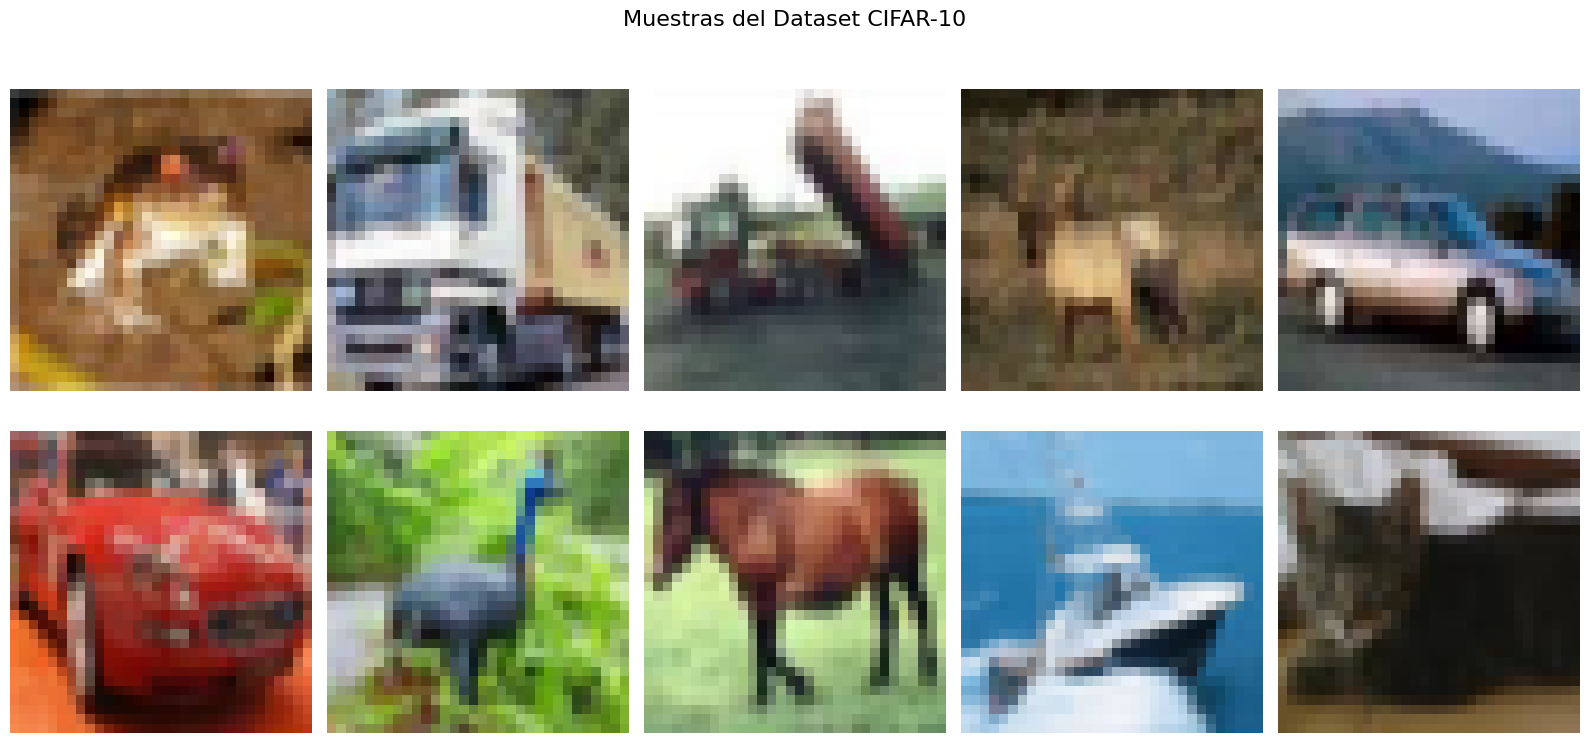

In [89]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.ravel()
for i in range(10):
    img = X_train[i]
    # Escalamos de vuelta de [-1, 1] a [0, 1] para visualización
    img_display = (img + 1) / 2
    axes[i].imshow(img_display)
    axes[i].axis('off')

plt.suptitle('Muestras del Dataset CIFAR-10', fontsize=16)
plt.tight_layout()
plt.show()

In [90]:
gan = GAN(latent_dim=100)
gan.generator.summary()
gan.discriminator.summary()

Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_57 (LeakyReLU)      │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_58 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_22             │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_59 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_23             │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_60 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_53 (LeakyReLU)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_54 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_55 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_56 (LeakyReLU)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 522,497 (1.99 MB)

In [91]:
import os

# Agrega la ruta de Graphviz bin al PATH, ajusta según tu instalación
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

In [ ]:
# Guardar diagramas (Graphviz/pydot ya puestos en requirements.txt)
save_model_plots(gan.generator, gan.discriminator, out_dir="../results/gan", dpi=110)

('../results\\generator.png', '../results\\discriminator.png')

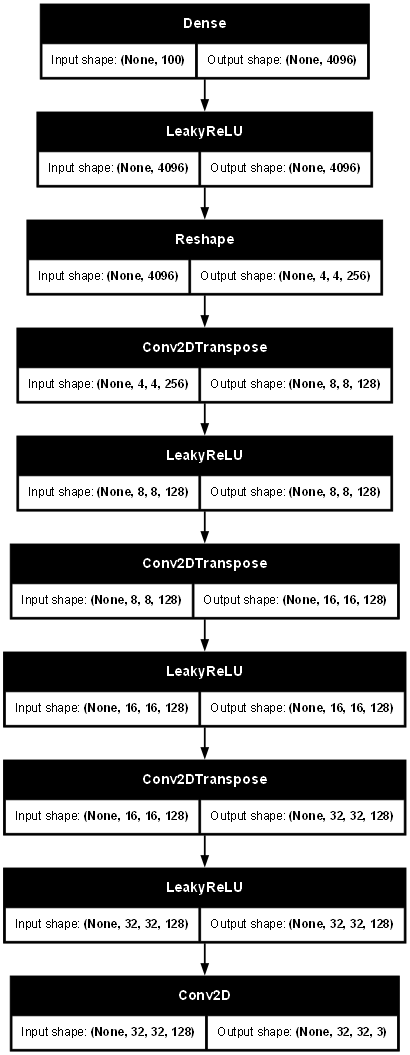

In [93]:
#Diagrama del generador
plot_model(gan.generator,show_shapes=True, dpi=64)


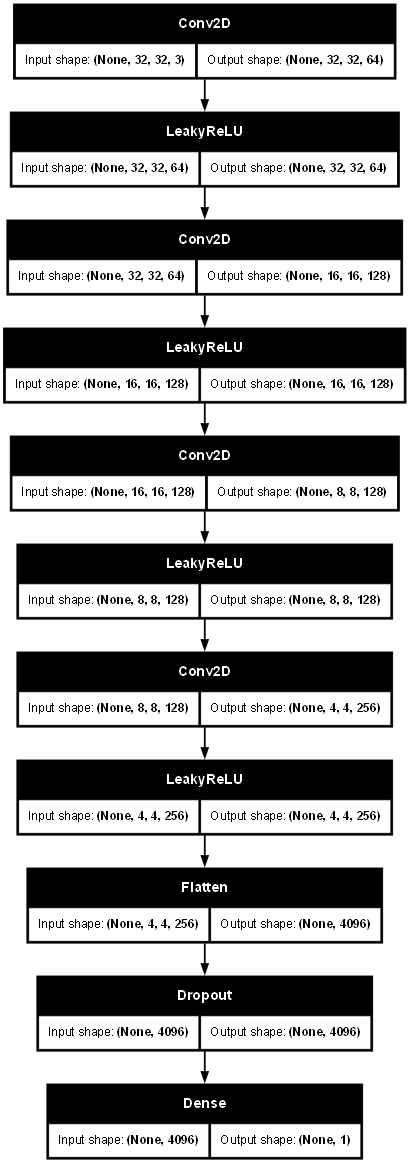

In [94]:
#Diagrama del discriminador
plot_model(gan.discriminator,show_shapes=True, dpi=64)

In [95]:
#ejemplos reales en el X_train
X_train.shape

(50000, 32, 32, 3)

Realizamos el entrenamiento ajustamos los epochs de acuerdo al hardware disponible

In [ ]:
train_gan(gan, X_train, n_epochs=90, n_batch=128, out_dir="../results/gan")

>1, 390/390, d1=1.021, d2=1.021 g=0.309
>2, 390/390, d1=1.064, d2=1.064 g=0.277
>3, 390/390, d1=1.083, d2=1.083 g=0.264
>4, 390/390, d1=1.094, d2=1.094 g=0.257
>5, 390/390, d1=1.100, d2=1.100 g=0.253
>6, 390/390, d1=1.106, d2=1.106 g=0.249
>7, 390/390, d1=1.110, d2=1.110 g=0.247
>8, 390/390, d1=1.115, d2=1.115 g=0.244
>9, 390/390, d1=1.120, d2=1.120 g=0.241
>10, 390/390, d1=1.126, d2=1.126 g=0.237
>Accuracy real: 67%, fake: 0%
✅ Saved ../results\generator_model_010.keras
>11, 390/390, d1=1.196, d2=1.196 g=0.234
>12, 390/390, d1=1.200, d2=1.200 g=0.231
>13, 390/390, d1=1.206, d2=1.206 g=0.228
>14, 390/390, d1=1.216, d2=1.217 g=0.225
>15, 390/390, d1=1.226, d2=1.227 g=0.221
>16, 390/390, d1=1.235, d2=1.236 g=0.218
>17, 390/390, d1=1.243, d2=1.244 g=0.215
>18, 390/390, d1=1.250, d2=1.250 g=0.212
>19, 390/390, d1=1.256, d2=1.256 g=0.209
>20, 390/390, d1=1.261, d2=1.261 g=0.206
>Accuracy real: 70%, fake: 0%
✅ Saved ../results\generator_model_020.keras
>21, 390/390, d1=1.325, d2=1.326 g=0.20

2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step WARNING:tensorflow:6 out of the last 62450 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001969C66A200> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


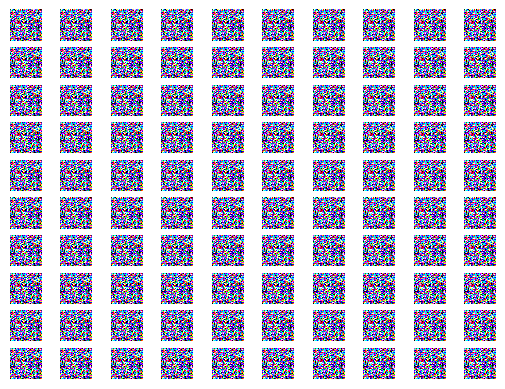

In [ ]:
# load model
model = load_model('../results/generator_model_090.keras')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
create_plot(X, 10)

Despues de casi 8 horas de entrenamiento tenemos una generacion de imagenes como la mostrada, si bien aun esta compuesta por ruido, se van formando las primeras estructuras teniendo en cuenta las primeras epocas.

Primeras 10 epochs

![image](../results/generated_plot_e010.png)

Despues de 90 epochs

[
    ![image](../results/generated_plot_e090.png)
](../results/generated_plot_090.png)

Conclusiones

El gan para cifar10 es un modelo complejo y que requiere de mucho tiempo de entrenamiento, en este caso 8 horas en una gpu 1650 ti. Si bien las imagenes generadas aun no son claras, se pueden observar las primeras estructuras que el modelo va aprendiendo. Con mas tiempo de entrenamiento y ajustes en los hiperparametros se podrian obtener mejores resultados. el gan esta compuesto por dos modelos, el generador y el discriminador, ambos son redes neuronales convolucionales profundas. El generador toma un vector de ruido como entrada y genera una imagen, mientras que el discriminador toma una imagen como entrada y determina si es real o generada. Durante el entrenamiento, el generador intenta engañar al discriminador para que clasifique sus imágenes como reales, mientras que el discriminador intenta mejorar su capacidad para distinguir entre imágenes reales y generadas. Este proceso de competencia entre los dos modelos es lo que permite al generador aprender a crear imágenes cada vez más realistas.